In [17]:
#import 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

In [18]:
#Set funcitons and their equations to be used later
def charge_on_C(qa,qb):
    qc = -(qa+qb)/3
    return qc    

#Set the function shell charge 
def shell_charge(qa,qb):
    qc = -(qa+qb)/3
    qsc = qc - 0.378
    return qsc

#Set the function of the spring constant
def spring(qsc):
    ksc = qsc**2/0.078
    return ksc




In [19]:
#Set energy values of atom B to go between parameters 1.5->2.5
qa = np.arange(0.5,1.6,0.1)
qa

array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

In [20]:
#Set energy values of atom B to go between parameters 1.5->2.5
qb = np.arange(1.5,2.6,0.1)
qb

array([ 1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5])

In [21]:
#turn the above data into a list of [qa,qb,qsc,ksc]
mylist = []

for A in qa:
    for B in qb:
        qsc = shell_charge(A,B)
        ksc = spring(qsc)
        
        mylist.append([A,B,qsc,ksc])

mylist = [item[0:4] for item in mylist]



In [22]:
#Start a new loop so that you can have a single file for each of the variable qa/qb states, 
#Using "w" to write the file
#Then fill in each line with the 

#Start a new loop so that you can have a single file for each of the variable qa/qb states, 
#Using "w" to write the file
#Then fill in each line with the 

for item in mylist:
    filename = open('140-Input-qa-%3.1f-qb-%3.1f.txt' %(item[0],item[1]), 'w')
    filename.write("opti prop cellonly \n")
    filename.write("cell \n")
    filename.write("5.8543 5.8543 3.9303 90.000 90.000 90.000 \n")
    filename.write("frac \n")
   

    filename.write("K   core     0.0000 0.0000 0.0000 \n")
    
    filename.write("Mn  core     0.0000 0.50000.5000  \n")
    
    filename.write("F   core     0.2273 0.7273 0.5000  \n")
    filename.write("F   core     0.00000  0.50000  0.00000 \n")
    filename.write("F   shel     0.2273 0.7273 0.5000  \n")
    filename.write("F   shel     0.00000  0.50000  0.00000 \n")

    filename.write("space \n")
    filename.write("140 \n")
    filename.write("species \n")
    filename.write("K   core %10.1f \n" % item[0])
    filename.write("Mn  core %10.1f \n" % (item[1]))
    filename.write("F   core 0.378 \n")
    filename.write("F   shel %18.12f \n" % (item[2]))
    filename.write("buckingham \n")
    filename.write("K   core K core   2189.190 0.1916   0.00 0.0 30.0 \n")
    filename.write("Mn  core F shel   1482.300 0.2664   0.00 0.0 30.0  \n")
    filename.write("F   shel F shel    911.690 0.2707  13.80 0.0 30.0  \n")
    filename.write("K   core F shel   3521.60  0.2672   0.00 0.0 30.0 \n")
    filename.write("spring \n")
    filename.write("F   %10.3f \n" % item[3])
    filename.write("output cif perov.cif \n")
    filename.close()

In [23]:
qa = np.arange(0.5,1.6,0.1)
qb = np.arange(1.5,2.6,0.1)
for i in qa:
    for j in qb:
        cmd = 'gulp < 127-Input-qa-%3.1f-qb-%3.1f.txt > out-qa-%3.1f-qb-%3.1f.txt'% (i,j,i,j)
        os.system(cmd)

In [27]:
!rm energies.dat
!for file in out-qa-*; do awk '{if ((/Final energy /) && ($5 == "eV")) print $4}' $file | tail -1 >> energies.dat ; done

In [28]:
!cp ../../../Cubic/Dispersion/C_0.2/energies_cubic.dat .

In [29]:
sg = []
cubic = []

file = open("energies.dat","r")
for line in file.readlines():
    sg.append(float(line.split()[0]))
file.close()
              
file = open("energies_cubic.dat","r")
for line in file.readlines():
    cubic.append(float(line.split()[0]))
file.close()

diff = []
for i, it in enumerate(sg):
    diff.append(it/2 - cubic[i]) 
                 
two_d = np.zeros(shape=(11,11))

for i in range(11):
    for j in range(11):
        two_d[i,j] = diff[i*11 + j]



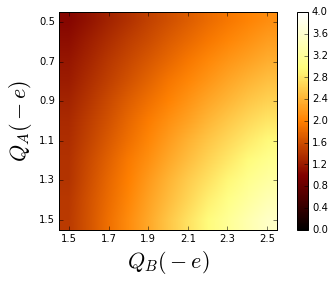

In [30]:
fig, ax = plt.subplots(1)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(two_d, cmap='afmhot', interpolation='bilinear', vmin=0, vmax=4)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)
ax.set_xlabel('$Q_B (-e)$',size=22)
ax.set_ylabel('$Q_A (-e)$',size=22)


labelsB = ['0.4', '0.5', '0.7', '0.9', '1.1', '1.3', '1.5']
labelsA = ['1.4', '1.5', '1.7', '1.9', '2.1', '2.3', '2.5']

ax.set_xticklabels(labelsA)
ax.set_yticklabels(labelsB)

plt.tight_layout()
plt.savefig('Spacegroup_127_energies_C2.png')
plt.show()